In [1]:
import pandas as pd
import numpy as np

In [2]:
## Data Preparation

In [3]:
# read file

In [4]:
df = pd.read_csv('adult.data')

In [5]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
# rename columns

In [7]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [8]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [11]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [12]:
## Data Visualization

In [13]:
import matplotlib.pyplot as plt

In [14]:
# Capital Loss/Gain vs Income

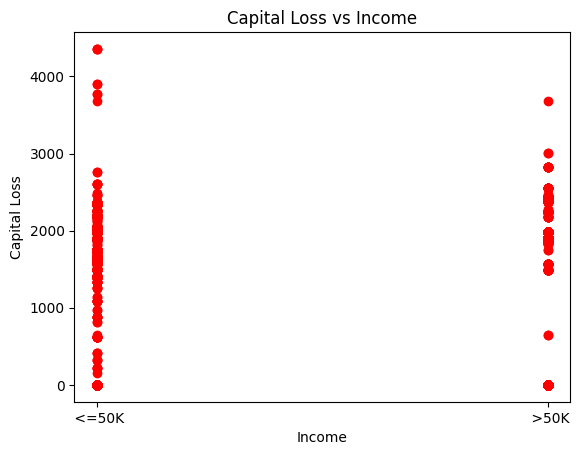

In [15]:
plt.scatter(df['income'], df['capital-loss'], color='red')
plt.title('Capital Loss vs Income')
plt.xlabel('Income')
plt.ylabel('Capital Loss')
plt.show()

In [16]:
# people with less than or equal to 50k in income have more and higher capital loss

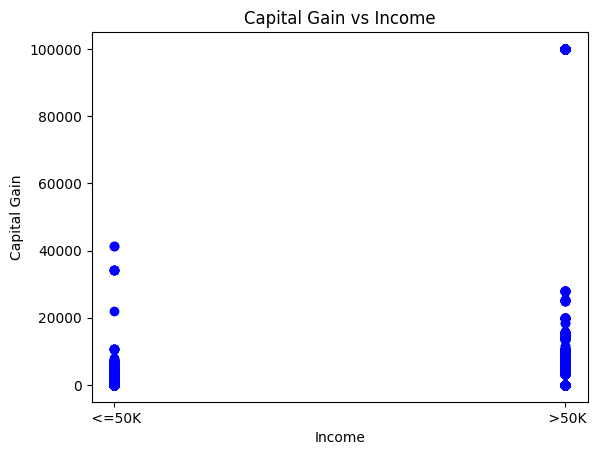

In [17]:
plt.scatter(df['income'], df['capital-gain'], color='blue')
plt.title('Capital Gain vs Income')
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.show()

In [18]:
# people with greater than 50k in income have more and higher capital gain

In [19]:
# Age and amount of people with each income of that age

In [20]:
sorted_age_less = sorted(df['age'][(df['income'] == ' <=50K')].unique())

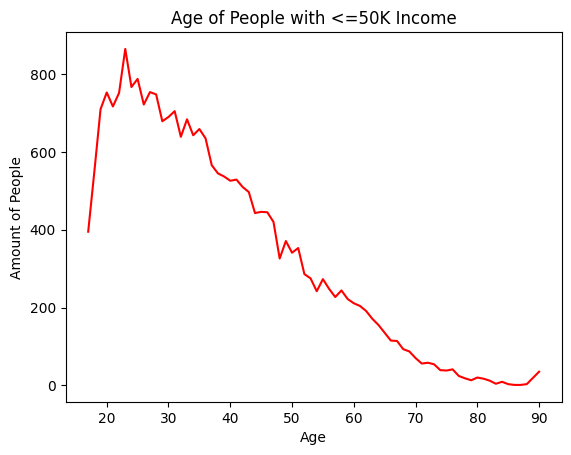

In [21]:
plt.plot(sorted_age_less, [len(df[(df['age'] == x) & (df['income'] == ' <=50K')]) for x in sorted_age_less], color='red')
plt.title("Age of People with <=50K Income")
plt.xlabel("Age")
plt.ylabel("Amount of People")
plt.show()

In [22]:
sorted_age_greater = sorted(df['age'][(df['income'] == ' >50K')].unique())

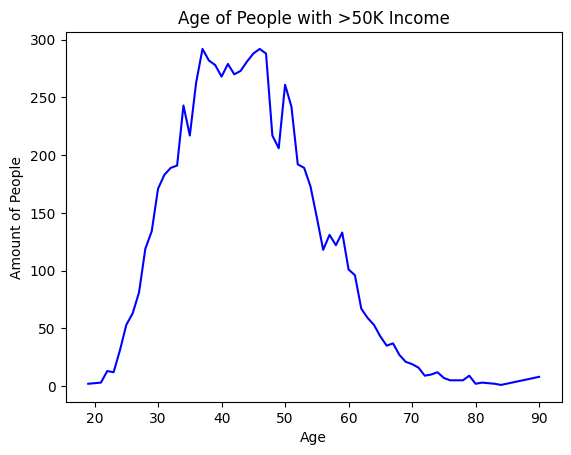

In [23]:
plt.plot(sorted_age_greater, [len(df[(df['age'] == x) & (df['income'] == ' >50K')]) for x in sorted_age_greater], color='blue')
plt.title("Age of People with >50K Income")
plt.xlabel("Age")
plt.ylabel("Amount of People")
plt.show()

In [24]:
# middle aged people have higher income and younger people have lower income

In [25]:
# change income to 1s and 0s, 1 is >50K, 0 is <=50K

In [26]:
df["income"] = (df["income"] == ' >50K').astype(int)

In [27]:
# keep only continuous columns

In [28]:
df = df[['age', 'fnlwgt','education-num', 'capital-gain','capital-loss','hours-per-week', 'income']]

In [29]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,50,83311,13,0,0,13,0
1,38,215646,9,0,0,40,0
2,53,234721,7,0,0,40,0
3,28,338409,13,0,0,40,0
4,37,284582,14,0,0,40,0


In [30]:
# logistic regression

In [31]:
x = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = log_reg.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
print(confusion_matrix(y_test, y_pred))

[[7139  238]
 [1769  622]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7377
           1       0.72      0.26      0.38      2391

    accuracy                           0.79      9768
   macro avg       0.76      0.61      0.63      9768
weighted avg       0.78      0.79      0.76      9768



In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_pred, y_test)

0.7945331695331695

In [41]:
# decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred = d_tree.predict(x_test)

In [45]:
print(confusion_matrix(y_test, y_pred))

[[6241 1136]
 [1114 1277]]


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7377
           1       0.53      0.53      0.53      2391

    accuracy                           0.77      9768
   macro avg       0.69      0.69      0.69      9768
weighted avg       0.77      0.77      0.77      9768



In [47]:
accuracy_score(y_pred, y_test)

0.7696560196560197

In [48]:
# random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = rf.predict(x_test)

In [52]:
print(confusion_matrix(y_test, y_pred))

[[6661  716]
 [1208 1183]]


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7377
           1       0.62      0.49      0.55      2391

    accuracy                           0.80      9768
   macro avg       0.73      0.70      0.71      9768
weighted avg       0.79      0.80      0.79      9768



In [54]:
accuracy_score(y_pred, y_test)

0.803030303030303

In [55]:
print("Best model: Random Forest")

Best model: Random Forest


In [56]:
best_model = rf